# Reconstruction of each ancestral genome leading to Atriophallophorus winterbourni and Gene Ontology Enrichment analysis of duplicated, retained and gained genes in each ancestor

Here we define how to run a reconstruction of each ancestral genome leading to A.winterbourni on our phylogenetic tree read in in newick format. We classify genes according to whether they arose through duplication, they were gained or they were retained since previous ancestral genome. We then perform a Gene Ontology Enrichment analysis using GOatools. In order to perform the analysis we load the gene annotation by Pannzer (http://ekhidna2.biocenter.helsinki.fi/sanspanz/), OMA (https://omabrowser.org/oma/functions/) and EggNOG (http://eggnog5.embl.de/) of each trematode species for Gene Ontology annotation of each ancestral gene set. 

Load in necessary libraries and GO annotations. Load in the trematode_df dataframe created using Ancestral_trematode_extant_species_analysis.ipynb

In [1]:
import pandas as pd
from goatools import obo_parser
from goatools.go_enrichment import GOEnrichmentStudy
import matplotlib.pyplot as plt
import pyham
from fractions import Fraction

#working_dir = 'define/working/directory/'
working_dir = "/Users/nglover/DataAnalysis/Trematode/"

# Load in the trematode_df, saved from another jupyter notebook, Ancestral_trematode_extant_species_analysis.ipynb
trematode_df = pd.read_csv(working_dir + "trematode.df", sep="\t")

# Load ontologies
# Read in downloaded go ontology file (describes terms and relationships among them)
go = obo_parser.GODag(working_dir + 'go.obo')

# Run pyham analysis, defined in previous jupyter notebook, Ancestral_trematode_extant_species_analysis.ipynb
nwk_file = working_dir + "oma_run_21Feb2020/Output/ManualSpeciesTree.nwk"
orthoxml_file =  working_dir + "oma_run_21Feb2020/Output/HierarchicalGroups.orthoxml"
ham_analysis = pyham.Ham(nwk_file, orthoxml_file, use_internal_name=True)

/Users/DataAnalysis/Trematode/go.obo: fmt(1.2) rel(2020-05-02) 47,240 GO Terms


Make a dataframe for all GO terms and associated genes for all extant trematode species in whole analysis. This will be used later for GO annotation of ancestral genomes. Mark a source of gene ontology annotation. 

In [ ]:
def read_in_pannzera_go_annotations(go_annotations_infile, species):
    '''returns a formatted pandas dataframe with relevant go info'''
    df = pd.read_csv(go_annotations_infile, sep="\t", dtype={'goid': object})
    df = df.rename({"qpid":"gene", "goid":"GO_term"}, axis=1)
    df['GO_term'] = df['GO_term'].apply(lambda x: "GO:"+ x)
    df['source'] = "PANNZER"
    df['species'] = species
    df['gene_go_term_combo'] = df['gene'] + "_" + df['GO_term']
    df = df.dropna(axis=0).drop_duplicates()
    #print("Read in {} GO annotations for {}.".format(len(df), go_annotations_infile))
    df = df[['species','gene', 'GO_term', 'source','gene_go_term_combo']]
    return df

def read_in_oma_go_annotations(go_annotations_infile, species):
    df = pd.read_csv(go_annotations_infile, sep="\t", skiprows=4, header=None)
    df = df[[1,4]].rename({1:"gene", 4:"GO_term"}, axis=1)
    df['source'] = "OMA"
    df['species'] = species
    df['gene_go_term_combo'] = df['gene'] + "_" + df['GO_term']
    df = df.dropna(axis=0).drop_duplicates()
    #print("Read in {} GO annotations for {}.".format(len(df), go_annotations_infile))
    df = df[['species','gene', 'GO_term', 'source','gene_go_term_combo']]
    return df

def read_in_eggnog_go_annotations(go_annotations_infile, species):
    df = pd.read_csv(go_annotations_infile, sep="\t", header=None)
    df = df[[1,2]].rename({1:"gene", 2:"GO_term"}, axis=1)
    df['source'] = "EGGNOG"
    df['species'] = species
    df['gene_go_term_combo'] = df['gene'] + "_" + df['GO_term']
    df = df.dropna(axis=0).drop_duplicates()
    #print("Read in {} GO annotations for {}.".format(len(df), go_annotations_infile))
    df = df[['species','gene', 'GO_term', 'source','gene_go_term_combo']]
    return df

pannzera_go_annotations = ["PAN_GO_Atriophallophorus_red3.txt",
"PAN_GO_Clonorchis_sinensis_GCA_003604175.txt",
"PAN_GO_Echinostoma_caproni_GCA_900618425.txt",
"PAN_GO_Fasciola_hepatica_GCA_002763495.txt",
"PAN_GO_Opisthorchis_felineus_GCA_004794785.txt",
"PAN_GO_Opisthorchis_viverrini_GCA_001990785.txt",
"PAN_GO_Schistosoma_bovis_GCA_003958945.txt",
"PAN_GO_Schistosoma_curassoni_GCA_900618015.txt",
"PAN_GO_Schistosoma_haematobium_GCA_000699445.txt",
"PAN_GO_Schistosoma_japonicum_GCA_006368765.txt",
"PAN_GO_Schistosoma_mansoni_GCA_000237925.txt",
"PAN_GO_Schistosoma_mattheei_GCA_900617995.txt",
"PAN_GO_Schistostoma_margrebowiei_GCA_900618395.txt",
"PAN_GO_Trichobilharzia_regenti_GCA_900618515.txt"]

oma_go_annotations = ["OMA_GO_Atriophallophorus_red3.txt",
"OMA_GO_Clonorchis_sinensis_GCA_003604175.txt",
"OMA_GO_Echinostoma_caproni_GCA_900618425.txt",
"OMA_GO_Fasciola_hepatica_GCA_002763495.txt",
"OMA_GO_Opisthorchis_viverrini_GCA_001990785.txt",
"OMA_GO_Opisthorchis_felineus_GCA_004794785.txt",
"OMA_GO_Schistosoma_bovis_GCA_003958945.txt",
"OMA_GO_Schistosoma_curassoni_GCA_900618015.txt",
"OMA_GO_Schistosoma_haematobium_GCA_000699445.txt",
"OMA_GO_Schistosoma_japonicum_GCA_006368765.txt",
"OMA_GO_Schistosoma_mansoni_GCA_000237925.txt",
"OMA_GO_Schistosoma_mattheei_GCA_900617995.txt",
"OMA_GO_Schistostoma_margrebowiei_GCA_900618395.txt",
"OMA_GO_Trichobilharzia_regenti_GCA_900618515.txt"]

eggnog_go_annotations = ["EGGNOG_Atriophallophorus_red3.txt",
"EGGNOG_Clonorchis_sinensis_GCA_003604175.txt",
"EGGNOG_Echinostoma_caproni_GCA_900618425.txt",
"EGGNOG_Fasciola_hepatica_GCA_002763495.txt",
"EGGNOG_Opisthorchis_felineus_GCA_004794785.txt",
"EGGNOG_Opisthorchis_viverrini_GCA_001990785.txt",
"EGGNOG_Schistosoma_bovis_GCA_003958945.txt",
"EGGNOG_Schistosoma_curassoni_GCA_900618015.txt",
"EGGNOG_Schistosoma_japonicum_GCA_006368765.txt",
"EGGNOG_Schistosoma_mansoni_GCA_000237925.txt",
"EGGNOG_Schistosoma_haematobium_GCA_000699445.txt",
"EGGNOG_Schistosoma_mattheei_GCA_900617995.txt",
"EGGNOG_Schistostoma_margrebowiei_GCA_900618395.txt",
"EGGNOG_Trichobilharzia_regenti_GCA_900618515.txt"]

# Read in all the data into a dataframe
all_go_df = pd.DataFrame(columns = ['gene', 'GO_term', 'source', 'species', 'gene_go_term_combo'])

for file in pannzera_go_annotations:
    species = file.split(".")[0].split("PAN_GO_")[1]
    df = read_in_pannzera_go_annotations(working_dir + "/DB/" + file, species)
    all_go_df = all_go_df.append(df)
    
for file in oma_go_annotations:
    species = file.split(".")[0].split("OMA_GO_")[1]
    df = read_in_oma_go_annotations(working_dir + "/DB/" + file, species)
    all_go_df = all_go_df.append(df)
    
for file in eggnog_go_annotations:
    species = file.split(".")[0].split("EGGNOG_")[1]
    df = read_in_eggnog_go_annotations(working_dir + "/DB/" + file, species)
    all_go_df = all_go_df.append(df)    

print(len(all_go_df))

Define functions that will help to reconstruct ancestral genomes and obtain duplicated, gained and retained genes in each of those genome since the previous ancestor. 

In [ ]:
#Make ancestral dataframe

def get_ancestral_hog_id(ancestral_hog):
    '''Ancestral hog id for this is a concatenation of all descendant genes'''
    ancestral_hog_id = str(ancestral_hog.get_all_descendant_genes())
    return ancestral_hog_id

def make_ancestral_dataframe(ancestral_genome_name, hamObj):
    '''
    This is where all the information about a particular ancestral genome is contained.
    I name the ancestral genes as the concatenation of all the descendant genes.
    Each row is a different descendant gene, thus there may be multiple rows with the same ancestral gene.
    '''
    #get ancestral genome using pyham
    ancestral_genome = hamObj.get_ancestral_genome_by_name(ancestral_genome_name)

    #get all ancestral genes (hogs)
    ancestral_genes = ancestral_genome.genes
    ancestral_genome_df = pd.DataFrame(ancestral_genes, columns={"ancestral_gene"})

    #get descendant genes of the hog
    ancestral_genome_df['descendant_genes'] = ancestral_genome_df.apply(lambda x: x["ancestral_gene"].\
                                                                        get_all_descendant_genes(), axis=1)

    #modify df so that each descendant gene has its own row
    ancestral_genome_df = ancestral_genome_df.set_index(['ancestral_gene'])['descendant_genes'].apply(pd.Series).stack()\
                                             .reset_index(level=1, drop=True).reset_index()

    #rename the column
    ancestral_genome_df = ancestral_genome_df.rename({0: "descendant_gene"}, axis=1)

    #make a string id of ancestral gene
    ancestral_genome_df['ancestral_gene_id'] = ancestral_genome_df.apply(lambda x: get_ancestral_hog_id(x['ancestral_gene']),\
                                                                         axis=1)

    #convert pyham gene name to cross-reference gene name
    ancestral_genome_df['descendant_gene_xref'] = ancestral_genome_df.apply(lambda x: x['descendant_gene'].\
                                                                            get_dict_xref()['protId'].\
                                                                            split(" ")[0], axis=1)
    
    print("There are {} ancestral genes in the {} genome.".\
          format(len(ancestral_genome_df.groupby('ancestral_gene_id').size()), ancestral_genome_name))

    return ancestral_genome_df

#get go terms from all_go_df
def get_ancestral_go_terms(ancestral_genome_df, all_go_df, source):
    '''Here, the ancestral GO terms are simply the GO terms for all the descendant genes combined.
    source is either "OMA" or "PANNZER" or "EGGNOG"'''
    df = pd.merge(left=ancestral_genome_df, right=all_go_df, how="left", left_on="descendant_gene_xref",right_on="gene")\
        [['ancestral_gene','ancestral_gene_id','descendant_gene','descendant_gene_xref','GO_term','source']]
    df = df[df['source']==source]
    return df

# def get_ancestral_df_and_go_terms(ancestor_of_interest, oma_or_pannzer_or_eggnog):
#     ancestral_df = make_ancestral_dataframe(ancestor_of_interest, ham_analysis)
#     ancestral_df = get_ancestral_go_terms(ancestral_df, all_go_df, oma_or_pannzer_or_eggnog)
#     return ancestral_df  

def get_fold_change(go_df):
    #convert ratios to floats and calculate fold change
    go_df['ratio_in_study2'] = go_df['ratio_in_study'].apply(lambda x: float(sum(Fraction(s) for s in x.split())))
    go_df['ratio_in_pop2'] = go_df['ratio_in_pop'].apply(lambda x: float(sum(Fraction(s) for s in x.split())))

    go_df['fold_change'] = go_df.apply(lambda x: x['ratio_in_study2']/x['ratio_in_pop2'], axis=1)
    return go_df

#  Get ancestral genes that have been duplicated, gained, or retained 
# In order to do a GO enrichment

def get_duplicated_gained_retained_lost_vertical(hamObj, genome1, genome2):
    '''performs all vertical comparisons (getting dup, ret, lost, gained genes)
    bettween two genomes. Genome 1 is the more ancient, and genome 2 is the more recent.'''
    
    ancestral_genomes_list = [x.name for x in hamObj.get_list_ancestral_genomes()]
    
    #check if genome1 is ancestral or extant
    if genome1 in ancestral_genomes_list:
        genome1 = hamObj.get_ancestral_genome_by_name(genome1)
    else:
        print("Genome 1 needs to be ancestral.")
        pass
    
    #check if genome2 is ancestral or extant
    if genome2 in ancestral_genomes_list:
        genome2 = hamObj.get_ancestral_genome_by_name(genome2)
    else:
        genome2 = hamObj.get_extant_genome_by_name(genome2)
        
    #run vertical comparison
    vertical_comparison = ham_analysis.compare_genomes_vertically(genome1, genome2)
    
    retained = vertical_comparison.get_retained()
    duplicated = vertical_comparison.get_duplicated()
    lost = vertical_comparison.get_lost()
    gained = vertical_comparison.get_gained()
    
    return duplicated, gained, retained, lost

#These next functions are for getting the study genes
def get_retained_ancestral_gene_ids(retained_obj):
    gene_ids = []
    for x in retained_obj.items():
        gene = x[1]
        #check whether gene is extant or ancestral
        if isinstance(gene.genome, pyham.genome.ExtantGenome):
            #get extant retained ids
            gene_ids.append(str(gene))
            
        if isinstance(gene.genome, pyham.genome.AncestralGenome):
            #get all descendant extant gene ids
            gene_ids.append(str(gene.get_all_descendant_genes()))
    print("Got {} ancestral genes which were retained."\
          .format(len(gene_ids)))
    return gene_ids

def get_duplicated_ancestral_gene_ids(duplicated_obj, copy_nr_threshold=0):
    print("Getting duplicated ancestral genes, with copy number threshold {}.".format(copy_nr_threshold))
    #ancestral
    dup_ancestral_genes = [x[1] for x in duplicated_obj.items() if len(x[1])>=copy_nr_threshold]
    dup_ancestral_genes= [item for sublist in dup_ancestral_genes for item in sublist]
    dup_gene_ids = [x.get_all_descendant_genes() for x in dup_ancestral_genes]
    dup_gene_ids = [str(x) for x in dup_gene_ids]
    return dup_gene_ids
            
def get_duplicated_extant_gene_ids(duplicated_obj, copy_nr_threshold=0):
    #extant
    dup_genes = [str(x[1]) for x in duplicated_obj.items() if len(x[1])>=copy_nr_threshold]
    return dup_genes

def get_gained_ancestral_gene_ids(gained_obj, species_nb_threshold=1):
    print("Getting gained ancestral genes, with species number threshold {}".format(species_nb_threshold))
    gained_genes = []

    gained_ancestral_genes = [(x.get_all_descendant_genes_clustered_by_species(),\
                              x.get_all_descendant_genes()) for x in gained_obj]

    for gained_ancestral_gene in gained_ancestral_genes:
        if len(gained_ancestral_gene[0])>= species_nb_threshold:
            extant_genes = gained_ancestral_gene[1]
            gained_genes.append(extant_genes)

    gained_genes = [str(x) for x in gained_genes]
    return gained_genes
# GO enrichment analysis
def make_go_study_obj(population, associations, go, propagate_counts=True):
    '''Use goatools to make GO enrichment study object. 
    population == background gene set
    associations == dictionary of gene: {go terms}
    go == go obo file
    '''
    methods = ['bonferroni', 'sidak', 'holm']
    go_study_obj = GOEnrichmentStudy(population, associations, go, 
                              propagate_counts=propagate_counts, 
                              alpha=0.05, 
                              methods=methods)
    return go_study_obj

def run_and_save_goenr(go_study_obj, list_of_genes_for_enrichment, working_dir):
    '''Do the go enrichment and write to file'''
    res = go_study_obj.run_study(list_of_genes_for_enrichment)
    go_study_obj.wr_tsv(working_dir + 'GO_df.tsv', res)
    return res

# Print a list of singificantly enriched GO terms to be submitted to REVIGO (http://revigo.irb.hr/)
def print_for_revigo(go_df, depth_cutoff=0):
    '''simply print the enriched GO terms and their p-values in order to copy and paste into revigo'''
    print(go_df[go_df['depth']>=depth_cutoff][["# GO","p_bonferroni"]].to_string(index=False, justify="left"))


def run_go_pipeline_for_ancestral_genes_part1(ancestral_genome_df, all_go_df, go_source):
    '''first part of go enrichment. Ancestral_genome_df needs to have GO terms already added.'''
    print(len(ancestral_genome_df))
    #1. get background population
    population = ancestral_genome_df['ancestral_gene_id'].unique()

    #2. get associations ##DEBUG changed ancestral_df to ancestral_genome_df
    ancestral_genome_go_terms_df = get_ancestral_go_terms(ancestral_genome_df, all_go_df, go_source)
    ancestral_genome_go_terms_df = ancestral_genome_go_terms_df[~ancestral_genome_go_terms_df['GO_term'].isnull()]
    groupobj = ancestral_genome_go_terms_df[['ancestral_gene_id','GO_term']].groupby('ancestral_gene_id')

    #associations are all the ancestral genes and their go terms (of all the extant genes)
    associations = {}
    for name, group in groupobj:
        associations[name] = set(group.GO_term.tolist())

    #3. initialize a GOEA object, which holds the Ontologies, Associations, and background.
    go_study_obj = make_go_study_obj(population, associations, go)
    print("made GO object")
    return go_study_obj

def run_go_pipeline_for_ancestral_genes_part2(study_genes, go_study_obj):
    #second part of GO enrichment (can change the study gene sets)
    #5. run gene ontology enrichment analysis
    run_and_save_goenr(go_study_obj, study_genes, working_dir)

    #6. read in dataframe that was just saved
    go_df = pd.read_csv(working_dir+"GO_df.tsv", sep="\t")

    #7. Filter by p-value and only looking at enriched not depleted go terms!
    go_df = go_df[(go_df['p_bonferroni']<=.05) & (go_df['enrichment']=="e")] 
    
    if len(go_df)>0:
        go_df = get_fold_change(go_df)

    return go_df


In [ ]:
def make_go_df(ancestor_of_interest, gene_class, source, outfile):
    print("ancestor_of_interest:", ancestor_of_interest)
    print("gene class: ", gene_class)
    print("source: ", source)
    
    copy_nr_threshold = 5
    
    if ancestor_of_interest=="Trematoda":
        previous_ancestor="Platyhelminths_clade1"
        species_nb_threshold= 10
            
    if ancestor_of_interest=="Plagiorchiida":
        previous_ancestor="Trematoda"
        species_nb_threshold= 4
            
    if ancestor_of_interest=="Xiphidiata_Opisthorchiata":
        previous_ancestor = "Plagiorchiida"
        species_nb_threshold= 2
     
    if ancestor_of_interest=="Atriophallophorus winterbourni":
        previous_ancestor = "Xiphidiata_Opisthorchiata"
        species_nb_threshold= 1   
    
            
    # get different sets of study objects
    duplicated, gained, retained, lost = get_duplicated_gained_retained_lost_vertical(ham_analysis,\
                                                                previous_ancestor, ancestor_of_interest)

    ancestral_df = make_ancestral_dataframe(ancestor_of_interest, ham_analysis)
    #print(ancestral_df)

    go_study_obj = run_go_pipeline_for_ancestral_genes_part1(ancestral_df, all_go_df, source)


    #get study genes
    if gene_class=="duplicated":
        study_genes = get_duplicated_ancestral_gene_ids(duplicated, copy_nr_threshold)
    if gene_class=="gained":
        study_genes = get_gained_ancestral_gene_ids(gained, species_nb_threshold)
    if gene_class=="retained":
        study_genes = get_retained_ancestral_gene_ids(retained)

    print("study genes: ", len(study_genes))
    #do go enrichment
    go_df = run_go_pipeline_for_ancestral_genes_part2(study_genes, go_study_obj)
    
    #write to output file
    go_df.to_csv(outfile, sep="\t")
    
    return go_df


In [ ]:
ancestors_of_interest = ["Trematoda","Plagiorchiida","Xiphidiata_Opisthorchiata", "Atriophallophorus winterbourni"]

gene_classes = ["duplicated","gained","retained"]
sources = ["OMA","PANNZER", "EGGNOG"]


for ancestor_of_interest in ancestors_of_interest:
    for gene_class in gene_classes:
        for source in sources:
            make_go_df(ancestor_of_interest, gene_class, source, working_dir + "ancestral_go/" +\
                       ancestor_of_interest +"_"+ gene_class +"_"+ source + ".csv")
            print("\n")

,ancestor,gene class,source,GO,name,NS,depth,enrichment,p_uncorrected,p_bonferroni,p_holm,p_sidak,ratio_in_pop,ratio_in_pop2,ratio_in_study,ratio_in_study2,fold_change,study_count,study_items
0,Atriophallophorus winterbourni,duplicated,OMA,GO:0006542,glutamine biosynthetic process,BP,10,e,9.397981e-25,6.481787e-21,6.479908e-21,6.318381e-21,54/11503,0.004694,28/484,0.057851,12.323385,28,augustus_masked-jcf7180000249279-processed-gen...
1,Atriophallophorus winterbourni,duplicated,OMA,GO:0009084,glutamine family amino acid biosynthetic process,BP,9,e,1.279368e-22,8.823803e-19,8.818686e-19,8.601354e-19,62/11503,0.005390,28/484,0.057851,10.733271,28,augustus_masked-jcf7180000249279-processed-gen...
2,Atriophallophorus winterbourni,duplicated,OMA,GO:0006541,glutamine metabolic process,BP,9,e,2.214403e-22,1.527274e-18,1.526166e-18,1.488771e-18,63/11503,0.005477,28/484,0.057851,10.562902,28,augustus_masked-jcf7180000249279-processed-gen...
3,Atriophallophorus winterbourni,duplicated,OMA,GO:0009064,glutamine family amino acid metabolic process,BP,8,e,1.591642e-19,1.097756e-15,1.096801e-15,1.070081e-15,77/11503,0.006694,28/484,0.057851,8.642374,28,augustus_masked-jcf7180000249279-processed-gen...
4,Atriophallophorus winterbourni,duplicated,OMA,GO:1901607,alpha-amino acid biosynthetic process,BP,8,e,1.591642e-19,1.097756e-15,1.096801e-15,1.070081e-15,77/11503,0.006694,28/484,0.057851,8.642374,28,augustus_masked-jcf7180000249279-processed-gen...


# Slims

The following code block is to get ALL the go enrichments into 1 final dataframe. It:
- Reads in ancestral GO enrichment files for each class, for each source
- Adds in the Atrio GO enrichment (from Natalia)
- Adds the information content (from Alex)

In [319]:
#read in all go dfs just made
#This is to get the final_df, all the raw go_df data

ancestors_of_interest = ["Trematoda","Plagiorchiida","Xiphidiata_Opisthorchiata", "Atriophallophorus winterbourni"]
gene_classes = ["duplicated","gained","retained"]
sources = ["OMA","PANNZER", "EGGNOG"]

final_go_df = pd.DataFrame()

for ancestor_of_interest in ancestors_of_interest:
    for gene_class in gene_classes:
        for source in sources:
            go_df = pd.read_csv(working_dir + "ancestral_go/" +\
                       ancestor_of_interest +"_"+ gene_class +"_"+ source + ".csv", sep="\t")
            
            go_df['ancestor'] = ancestor_of_interest
            go_df['gene class'] = gene_class
            go_df['source'] = source
            final_go_df = final_go_df.append(go_df)

#just get rid of that annoying "#"
final_go_df = final_go_df.rename({"# GO": "GO"}, axis=1)

#these are the final fields we want + pos_ic
columns = [ 'ancestor','gene class','source', 'GO','name','NS', 'depth', 'enrichment',
         'p_uncorrected','p_bonferroni', 'p_holm','p_sidak',  'ratio_in_pop', 'ratio_in_pop2',
       'ratio_in_study', 'ratio_in_study2',  'fold_change', 'study_count','study_items']
            
final_go_df = final_go_df[columns]

#add in Atrio from Natalia to the mix
atrio_go_df = pd.read_csv('~/Downloads/Atrio_enrichedGO_df.csv', sep=",")

atrio_go_df = atrio_go_df[columns]

#concatenate the final_go_df (with all the 3 ancestors) with atrio_df
final_go_df = pd.concat([final_go_df, atrio_go_df], ignore_index=True)

#information content for all go terms from alex
ic_df = pd.read_csv('~/Downloads/ic.tsv.gz', sep='\t')
ic_df['GO'] = ic_df['t'].apply(lambda x: "GO:"+ str(x).rjust(7,'0')) #this pads the GO so its in the right format

#add the positive IC to the final_go_df
final_go_df = pd.merge(left=final_go_df, right=ic_df[['GO','pos_ic']], how="left", on="GO")

final_go_df[:3]


/Users/nglover/.pyenv/versions/3.6.0/envs/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,ancestor,gene class,source,GO,name,NS,depth,enrichment,p_uncorrected,p_bonferroni,p_holm,p_sidak,ratio_in_pop,ratio_in_pop2,ratio_in_study,ratio_in_study2,fold_change,study_count,study_items,pos_ic
0,Trematoda,duplicated,OMA,GO:0005921,gap junction,CC,5,e,1.883050e-10,0.000002,0.000002,0.000002,41/13281,0.003087,7/52,0.134615,43.605535,7,"[Gene(144686), Gene(136376), Gene(136375)], [G...",12.557585
1,Trematoda,duplicated,OMA,GO:0005911,cell-cell junction,CC,4,e,1.982264e-08,0.000184,0.000184,0.000180,78/13281,0.005873,7/52,0.134615,22.920858,7,"[Gene(144686), Gene(136376), Gene(136375)], [G...",7.130303
2,Trematoda,duplicated,OMA,GO:0070161,anchoring junction,CC,3,e,1.575950e-07,0.001466,0.001466,0.001429,105/13281,0.007906,7/52,0.134615,17.026923,7,"[Gene(144686), Gene(136376), Gene(136375)], [G...",7.931322


This stores the GO slim subsets. Here we use Slim Generic or Slim AGR (Alliance for Genomic Resources). They were downloaded from http://geneontology.org/docs/download-ontology/

In [203]:
import requests
import json
import numpy as np

#Here are the list of GO Slim terms

#command line to get list of terms: egrep "^id: GO:" goslim_agr.obo |cut -d " " -f 2|sed "s/.*/\"&\",/"

slim_generic =["GO:0000003",
"GO:0000228",
"GO:0000229",
"GO:0000278",
"GO:0000902",
"GO:0002376",
"GO:0003013",
"GO:0003674", #molecular function
"GO:0003677",
"GO:0003700",
"GO:0003723",
"GO:0003729",
"GO:0003735",
"GO:0003924",
"GO:0004386",
"GO:0004518",
"GO:0005198",
"GO:0005575",
"GO:0005576",
"GO:0005615",
"GO:0005618",
"GO:0005622",
"GO:0005623",
"GO:0005634",
"GO:0005635",
"GO:0005654",
"GO:0005694",
"GO:0005730",
"GO:0005737",
"GO:0005739",
"GO:0005764",
"GO:0005768",
"GO:0005773",
"GO:0005777",
"GO:0005783",
"GO:0005794",
"GO:0005811",
"GO:0005815",
"GO:0005829",
"GO:0005840",
"GO:0005856",
"GO:0005886",
"GO:0005929",
"GO:0005975",
"GO:0006091",
"GO:0006259",
"GO:0006397",
"GO:0006399",
"GO:0006412",
"GO:0006457",
"GO:0006464",
"GO:0006520",
"GO:0006605",
"GO:0006629",
"GO:0006790",
"GO:0006810",
"GO:0006913",
"GO:0006914",
"GO:0006950",
"GO:0007005",
"GO:0007009",
"GO:0007010",
"GO:0007034",
"GO:0007049",
"GO:0007059",
"GO:0007155",
"GO:0007165",
"GO:0007267",
"GO:0007568",
"GO:0008092",
"GO:0008134",
"GO:0008135",
"GO:0008150", #biological process
"GO:0008168",
"GO:0008219",
"GO:0008233",
"GO:0008283",
"GO:0008289",
"GO:0009056",
"GO:0009058",
"GO:0009536",
"GO:0009579",
"GO:0009790",
"GO:0015031",
"GO:0015979",
"GO:0016192",
"GO:0016301",
"GO:0016491",
"GO:0016746",
"GO:0016757",
"GO:0016765",
"GO:0016779",
"GO:0016791",
"GO:0016798",
"GO:0016810",
"GO:0016829",
"GO:0016853",
"GO:0016874",
"GO:0016887",
"GO:0019748",
"GO:0019843",
"GO:0019899",
"GO:0021700",
"GO:0022607",
"GO:0022618",
"GO:0022857",
"GO:0030154",
"GO:0030198",
"GO:0030234",
"GO:0030312",
"GO:0030533",
"GO:0030555",
"GO:0030674",
"GO:0030705",
"GO:0031012",
"GO:0031410",
"GO:0032182",
"GO:0032196",
"GO:0032991",
"GO:0034330",
"GO:0034641",
"GO:0034655",
"GO:0040007",
"GO:0040011",
"GO:0042254",
"GO:0042393",
"GO:0042592",
"GO:0043167",
"GO:0043226",
"GO:0043473",
"GO:0044281",
"GO:0044403",
"GO:0048646",
"GO:0048856",
"GO:0048870",
"GO:0050877",
"GO:0051082",
"GO:0051186",
"GO:0051276",
"GO:0051301",
"GO:0051604",
"GO:0055085",
"GO:0061024",
"GO:0065003",
"GO:0071554",
"GO:0071941",
"GO:0140014"]

slim_agr = ["GO:0000003",
"GO:0002376",
"GO:0003677",
"GO:0003700",
"GO:0003723",
"GO:0003824",
"GO:0005102",
"GO:0005198",
"GO:0005215",
"GO:0005576",
"GO:0005634",
"GO:0005694",
"GO:0005739",
"GO:0005768",
"GO:0005773",
"GO:0005783",
"GO:0005794",
"GO:0005829",
"GO:0005856",
"GO:0005886",
"GO:0005975",
"GO:0006259",
"GO:0006629",
"GO:0007049",
"GO:0007610",
"GO:0008092",
"GO:0008134",
"GO:0008219",
"GO:0008283",
"GO:0008289",
"GO:0009056",
"GO:0016043",
"GO:0016070",
"GO:0019538",
"GO:0023052",
"GO:0030054",
"GO:0030154",
"GO:0030234",
"GO:0030246",
"GO:0031410",
"GO:0032502",
"GO:0032991",
"GO:0036094",
"GO:0038023",
"GO:0042592",
"GO:0042995",
"GO:0045202",
"GO:0046872",
"GO:0050877",
"GO:0050896",
"GO:0051234",
"GO:0097367",
"GO:1901135"]

In order to use GO slim terms, we need to map the GO terms to their propoer GO slim terms. First get a list of the GO terms we need to map:

In [322]:
#These are the terms from the df that I want to map to their GO slim term
go_terms_to_slim = list(set(final_go_df['GO'].tolist()))
len(go_terms_to_slim)

862

Use the EBI website's API for mapping GO terms to their GO slim. The final result is a slims_df table, which contains the original GO term (slimsFromId), and the GO slim term it maps to (slimsToIds).

In [323]:
#Use the EBI website to map go terms to their slim term

def format_go_terms_for_url(list_of_go_terms):
    '''Prepares a list of go terms for url by concatenting them in the special format'''
    go_ids_just_numbers = ["GO%3A" + x.split(":")[1] + '%2C' for x in list_of_go_terms]
    go_ids_for_url = ''.join(go_ids_just_numbers) 
    return(go_ids_for_url)

def get_slim_df(slim_set, go_terms_to_slim):
    '''makes the url and request to map the go terms to their go slim term. 
    Stores result in a df'''
    
    slim_url = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/slim?slimsToIds=" + format_go_terms_for_url(slim_set)
    
    go_ids_url = format_go_terms_for_url(go_terms_to_slim)

    requestURL = slim_url + "&slimsFromIds=" + go_ids_url + "&relations=is_a%2Cpart_of%2Coccurs_in%2Cregulates"

    r = requests.get(requestURL, headers={ "Accept" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    slim_df = pd.DataFrame(r.json()['results'])
    slim_df['slimsToIds'] = slim_df['slimsToIds'].apply(lambda x: x[0])

    return slim_df

#split terms to map to go slim into chunks
chunked_go_terms_to_slim = np.array_split(go_terms_to_slim, 10)

slim_df = pd.DataFrame()

#run the requests by chunks
for chunk in chunked_go_terms_to_slim:
    tmp_df = get_slim_df(slim_generic, chunk)
    slim_df = slim_df.append(tmp_df)
    
slim_df[:5]

,slimsFromId,slimsToIds
0,GO:0043565,GO:0003677
1,GO:0016135,GO:0009058
2,GO:0016125,GO:0006629
3,GO:0065008,GO:0008150
4,GO:0065004,GO:0065003


But we don't know the names of the GO slim terms, so we can also get that from the EBI API:

In [324]:
def get_slim_names(go_ids_to_get_names_for):
    '''This function just gets the name of a given GO term'''
    
    requestURL_names = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/" + format_go_terms_for_url(go_ids_to_get_names_for)

    r = requests.get(requestURL_names, headers={ "Accept" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    responses = r.json()['results']
    names_df = pd.DataFrame(responses)
    names_df = names_df[['id','name']]
    names_df = names_df.rename({'name':"go_slim_name"}, axis=1)
    
    return names_df


#split into chunks so server will run
chunked_go_terms = np.array_split(slim_df['slimsToIds'], 10)

names_df = pd.DataFrame()

for chunk in chunked_go_terms:
    tmp_df = get_slim_names(chunk)
    names_df = names_df.append(tmp_df)
    
names_df = names_df.drop_duplicates()
    
names_df[:5]

,id,go_slim_name
0,GO:0008150,biological_process
1,GO:0003674,molecular_function
2,GO:0006629,lipid metabolic process
3,GO:0009058,biosynthetic process
4,GO:0034641,cellular nitrogen compound metabolic process


Putting everyhing together now. That is, the final_go_df from before, but now adding to it the slims_df (GO -> GO slim mapping), and the GO slim names. We also clean up the dataframe to only take the columns we want.

In [325]:
#final merge with original dataframe

final_go_df = pd.merge(left=final_go_df, right=slim_df, how="left", left_on="GO", right_on="slimsFromId")
final_go_df = pd.merge(left=final_go_df, right=names_df, left_on="slimsToIds", right_on="id")

final_go_df = final_go_df[[ 'ancestor','gene class','source', 'GO','name','id','go_slim_name','NS', 'depth', 'enrichment',
         'p_uncorrected','p_bonferroni', 'p_holm','p_sidak',  'ratio_in_pop', 'ratio_in_pop2',
       'ratio_in_study', 'ratio_in_study2',  'fold_change', 'study_count','study_items', 'pos_ic']]
final_go_df = final_go_df.rename({"id":"GO_slim"}, axis=1)

Now we want to make 3 heatmaps, one for duplicated, one for gained, and one for retained. The heatmaps will show the GO slim terms on the y-axis, the ancestors on the x-axis, and the cells will be colored according to information content (IC). Additionally, inside each cell, we want to put the number of genes in total enriched for that particular GO term. So the first step is counting the number of enriched genes for each go slim term.

In [326]:
#This code block is for getting set of enriched genes for each go slim term

ancestors_of_interest = ["Trematoda","Plagiorchiida","Xiphidiata_Opisthorchiata", "Atriophallophorus winterbourni"]
gene_classes = ["duplicated","gained","retained"]
sources = ["OMA","PANNZER", "EGGNOG"]


import re

def split_study_genes(study_items_string_list, ancestor_of_interest):   
    '''This function takes a series of study genes (strings) from the GO enrichment and separates them all in a list'''
    
    
    if ancestor_of_interest=="Atriophallophorus winterbourni":
        #initiate empty list where will will store the final list of genes
        mygenes = []

        #input data
        #print("This is what the original data looks like: ")

        #go through all the cells of study items, if there are multiple rows (i.e. multiple go terms for a given go slim)
        for study_items in study_items_string_list:
            #how many genes?
            #print("nb genes: ", len(study_items))

            #what is the datatype? (i.e. string vs. list)
            #print(type(study_items))
            #print("study_items: ", study_items, "\n")

            #split each element (study_item) into individual genes
            separate_genes = study_items.split(",")
            #print("separate_genes: ", separate_genes,"\n")

            #This part removes the square brackets from ancestral genes, as well as whitespace (strip)
            separate_genes = [x.replace("[", "") for x in separate_genes]
            separate_genes = [x.replace("]", "") for x in separate_genes]
            separate_genes = [x.strip() for x in separate_genes]

            #print("separate_genes, with whitespace and brackets removed: ", separate_genes, "\n")
            #print("separate_genes is now a {}.\n".format(type(separate_genes)))

            #add our list of genes to mygenes
            mygenes.append(separate_genes)

        #print("---------------ALL LOOPS DONE---------------\n")

        #what does mygenes look like?
        #print("mygenes: ", mygenes, "\n")

        #we can see that mygenes is a list of lists, so we need to flatten the list
        mygenes = [item for sublist in mygenes for item in sublist]

        #now we can see it is one big list, not several lists anymore
        #print("mygenes, only 1 list:", mygenes, "\n")

        #now we have to remove duplicates from the list
        mygenes = set(mygenes)
        #print("final mygenes: ", mygenes, "\n")

        return mygenes
    
    if ancestor_of_interest!="Atriophallophorus winterbourni":
        mygenes = []
        for study_items in study_items_string_list:
            separate_genes = re.split('\[(.*?)\]', study_items)
            for separate_gene in separate_genes:
                if (separate_gene !='') & (separate_gene !=', '):
                    mygenes.append(separate_gene)
                    
        mygenes = set(mygenes)
        return mygenes
        

#for testing
# go_slim_name = "ion binding"
# ancestor_of_interest ="Xiphidiata_Opisthorchiata"
# ancestor_of_interest ="Atriophallophorus winterbourni"
# gene_class = "duplicated"

# df = final_go_df[(final_go_df['ancestor']==ancestor_of_interest) & (final_go_df['gene class']==gene_class) & (final_go_df['go_slim_name']==go_slim_name)]
# split_study_genes(df['study_items'], ancestor_of_interest)


Now we use the split_study_genes function to count the number of enriched genes for each ancestor, gene class, and go slim category:


In [327]:
#we want to count the genes for each go slim name, so first get those as a list (set)
go_slim_names = set(final_go_df['go_slim_name'].tolist())


#initiate and emtpy data frame to store the final counts
go_slim_names_gene_counts_df = pd.DataFrame()

#loop through all of our ancestors, gene classes, and go slim names
for ancestor_of_interest in ancestors_of_interest:
    for gene_class in gene_classes:
        for go_slim_name in go_slim_names:
            
            #select the data we want, which are the rows that correspond to our ancestor, gene class, and go slim
            subset_df = final_go_df[(final_go_df['ancestor']== ancestor_of_interest) &\
                                    (final_go_df['gene class']== gene_class) &\
                                       (final_go_df['go_slim_name']==go_slim_name)]
            
            #we only want study items (i.e. enriched genes)
            study_items = subset_df['study_items']
            
            #get the mean positive information content
            mean_pos_ic = subset_df['pos_ic'].mean()
            
            #use the function from the code block above to split the study genes
            mygenes = split_study_genes(study_items, ancestor_of_interest)
            
            #how many are there?
            count = len(mygenes)
            
            #make a row containing all of this information...
            tmp_df = pd.DataFrame({"ancestor": [ancestor_of_interest], "gene class": [gene_class],\
                                   "go_slim_name": [go_slim_name], "nb_genes": count, "mean_IC": mean_pos_ic})
            
            #and add it to the 
            go_slim_names_gene_counts_df = go_slim_names_gene_counts_df.append(tmp_df)
            

#There will be some blanks in the dataframe because not every ancestor or gene class has enriched genes in every GO slim category. So we fill those with 0.
go_slim_names_gene_counts_df = go_slim_names_gene_counts_df.fillna(0)
  

In [328]:
#save data
final_go_df.to_csv(working_dir + "final_go_df.txt", sep="\t")
go_slim_names_gene_counts_df.to_csv(working_dir + "go_slim_names_gene_counts_df.txt", sep="\t")

So this go_slim_names_gene_counts_df is what we will use to make the heatmaps. Here is what is contained in it:

In [330]:
go_slim_names_gene_counts_df[:10]

,ancestor,gene class,go_slim_name,nb_genes,mean_IC
0,Trematoda,duplicated,mRNA binding,0,0.000000
0,Trematoda,duplicated,protein transport,0,0.000000
0,Trematoda,duplicated,nucleotidyltransferase activity,0,0.000000
0,Trematoda,duplicated,organelle,0,0.000000
0,Trematoda,duplicated,cytosol,0,0.000000
0,Trematoda,duplicated,transmembrane transporter activity,4,12.688543
0,Trematoda,duplicated,transport,4,12.760676
0,Trematoda,duplicated,catabolic process,0,0.000000
0,Trematoda,duplicated,nuclease activity,0,0.000000
0,Trematoda,duplicated,cofactor metabolic process,0,0.000000


Finally, let's make the heatmaps!

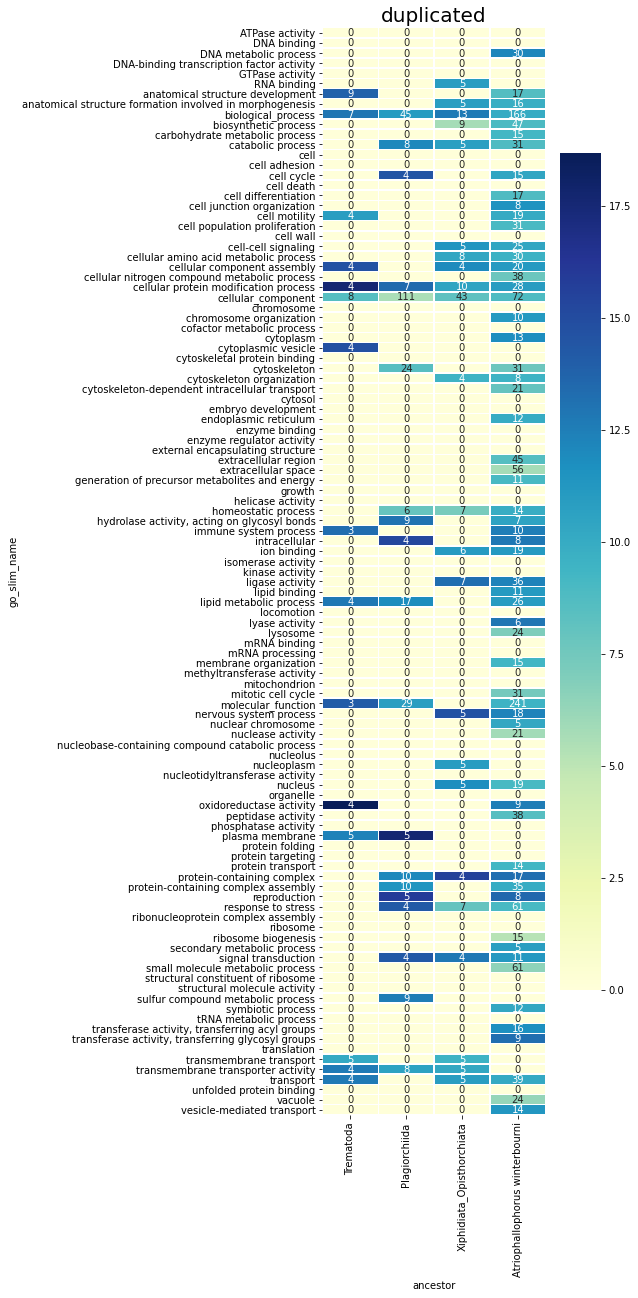

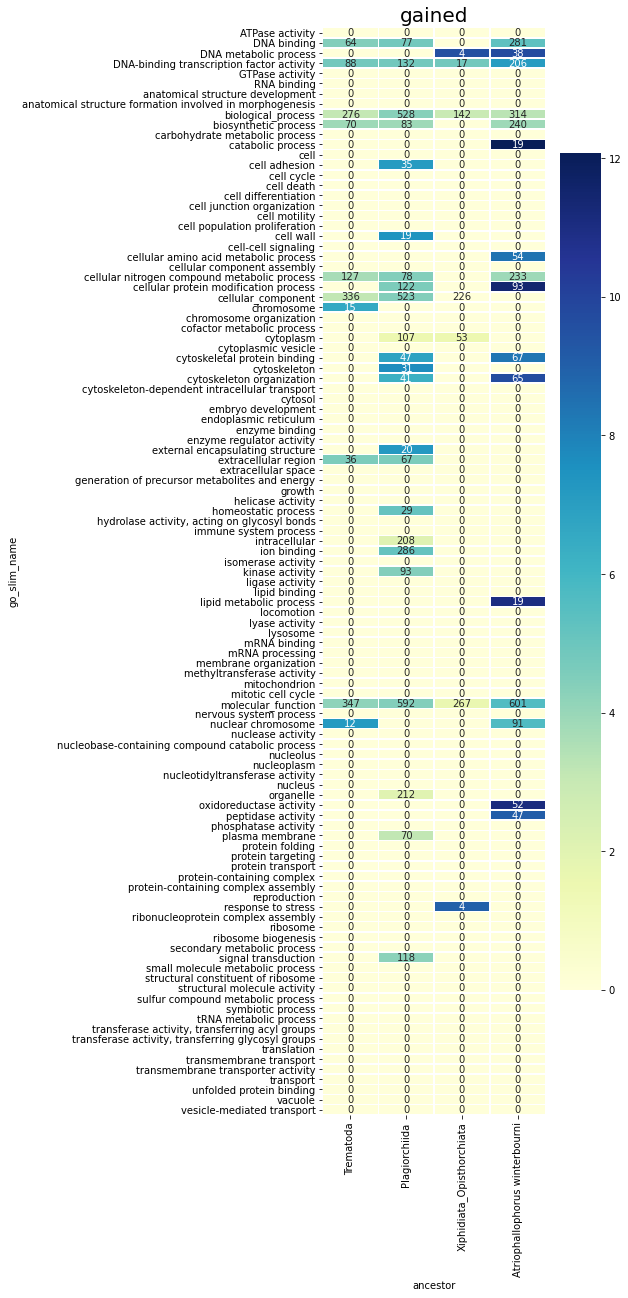

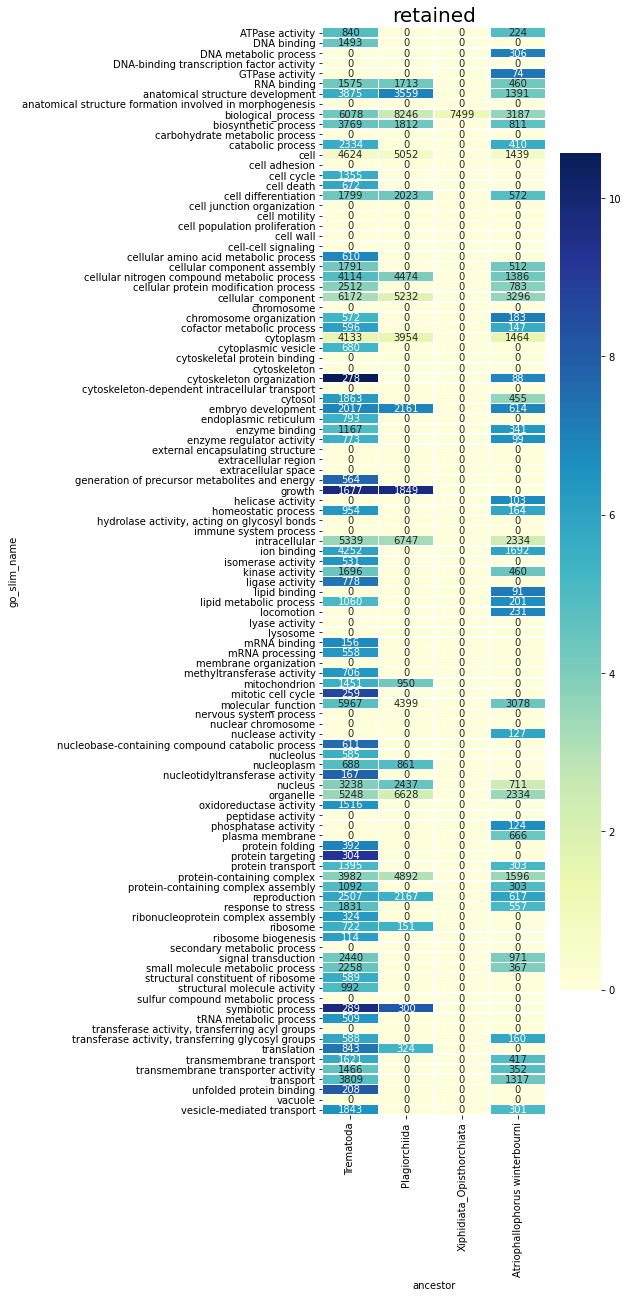

In [333]:
import seaborn as sns 


for gene_class in gene_classes:
    annotations = go_slim_names_gene_counts_df[go_slim_names_gene_counts_df['gene class']==gene_class]\
                .pivot("ancestor","go_slim_name","nb_genes").T[['Trematoda','Plagiorchiida', 'Xiphidiata_Opisthorchiata','Atriophallophorus winterbourni']]


    fig, ax = plt.subplots(figsize=(5,20))

    sns.heatmap(go_slim_names_gene_counts_df[go_slim_names_gene_counts_df['gene class']==gene_class]\
                .pivot("ancestor","go_slim_name","mean_IC").T[['Trematoda','Plagiorchiida', 'Xiphidiata_Opisthorchiata','Atriophallophorus winterbourni']],\
                vmin=0, cmap="YlGnBu",linewidths=.5,\
                annot=annotations, fmt='g')
    plt.title(gene_class, fontsize=20)